## 5.2 회귀분석의 기하학

### 회귀 벡터공간

선형 회귀분석으로 예측한 값 $\hat{y}$는 $X$의 각 열 $c_1, \cdots, c_M$의 선형조합으로 표현된다. 

$$ 
\begin{aligned}
\hat{y} 
&= Xw \\
&= \begin{bmatrix} c_1 & \cdots & c_M \end{bmatrix} \begin{bmatrix} w_1 \\ \vdots \\ w_M \end{bmatrix} \\
&= w_1 c_1 + \cdots + w_M c_M 
\end{aligned}
$$

모든 열이 선형독립이면 예측값 $\hat{y}$는 $X$의 각 열 $c_1, \cdots, c_M$을 기저벡터(basis vector)로 하는 벡터공간(vector space)위에 존재한다는 것을 알 수 있다.

실제 종속변수 데이터 $y$와 예측값 $\hat{y}$의 차이가 잔차 벡터 $e$이다. 따라서 잔차 벡터 $e$의 크기를 가장 작게 만드는 최적의 예측값 $\hat{y}$는 벡터공간내에 존재하면서 $y$와 가장 가까운 벡터이다. 이 때 잔차 벡터 $e$는 벡터 공간에 직교한다. 따라서 예측값 벡터 $\hat{y}$는 $y$를 $X$의 각 열 $c_1, \cdots, c_M$을 기저벡터로 하는 벡터공간에 투영(projection)한 벡터이고 잔차 벡터 $e$는 투영하고 남은 직교 벡터이다.

In [1]:
%load_ext tikzmagic

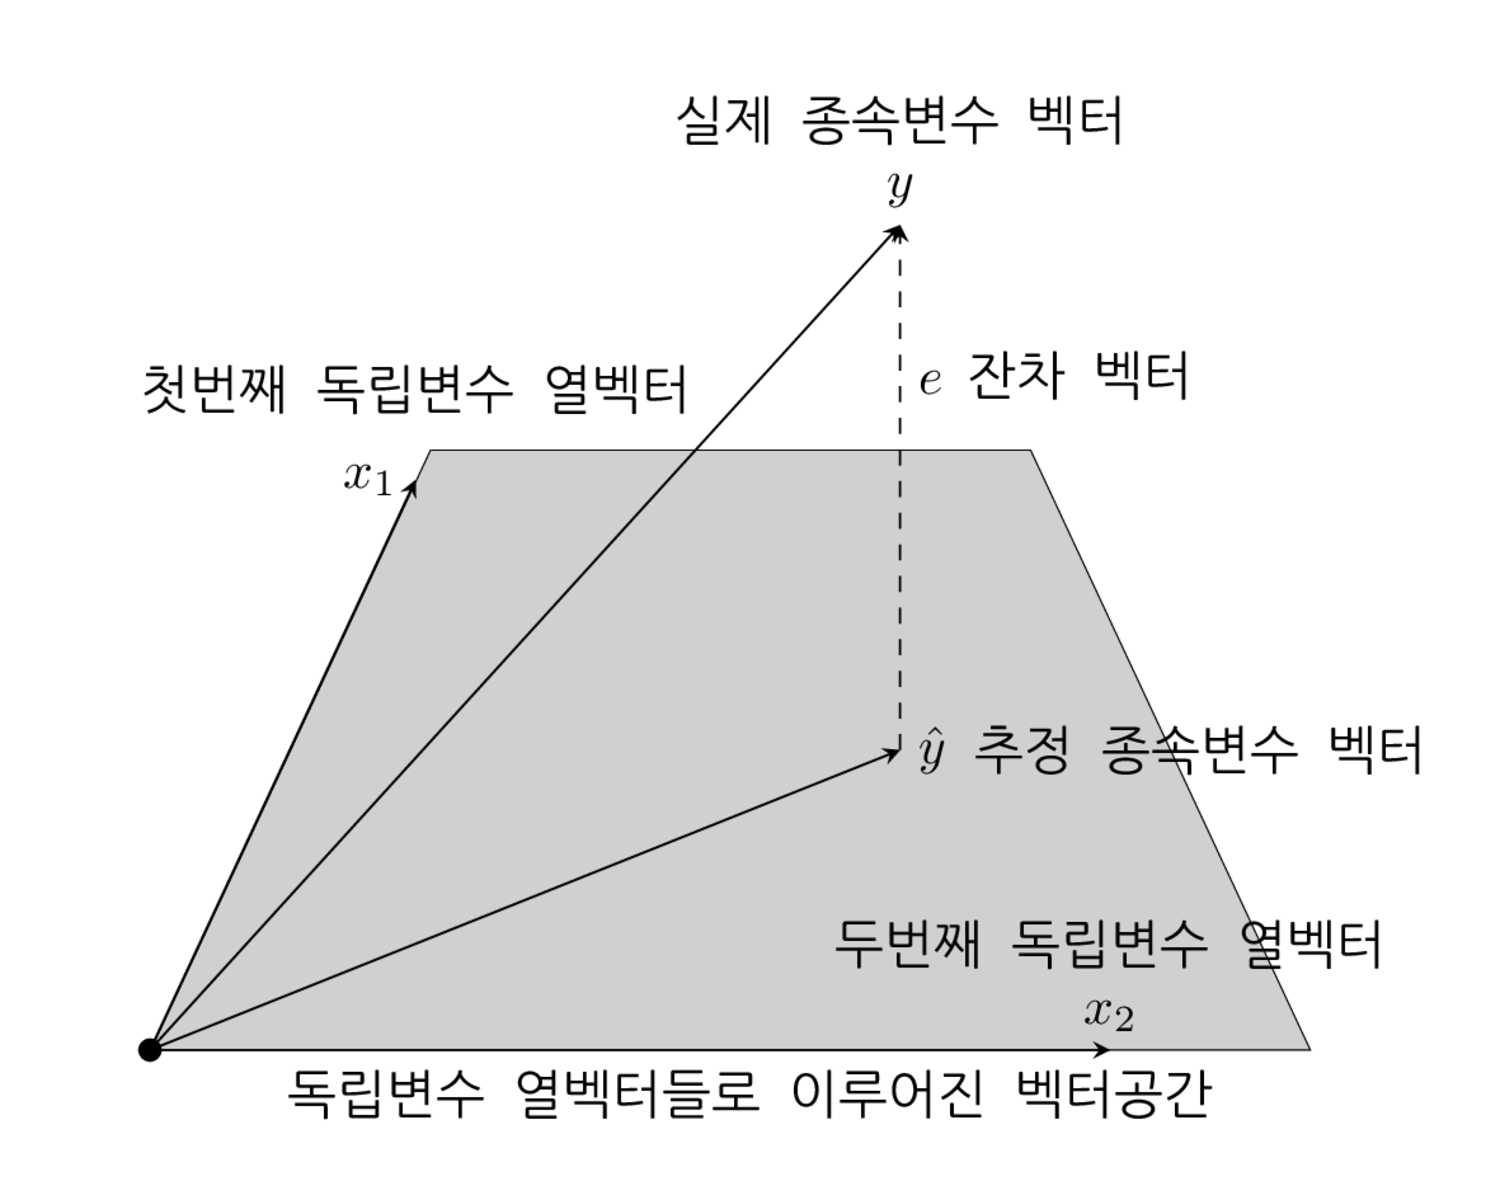

In [2]:
%%tikz -p kotex,pgfplots,pgffor -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (leftbottom) at (-1,-1);
\coordinate (righttop) at (9,7);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines,white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily}
}

\tikzstyle{channel}=[trapezium, draw,  shape border uses incircle, minimum size=4cm,
trapezium left angle=65, trapezium right angle=65]

\node[channel,fill=darkgray!30,draw=black,xshift=3.87cm,yshift=2cm, line width=0.2] at (0,0) (background) {};

\coordinate (origin) at (0,0,0);
\draw[fill] (origin) circle (2pt);
\draw [->] (origin) -- (1.77,3.8,0) coordinate (x1) node[left] {$\small{x_1}$};
\node at ($(x1)+(0,0.6)$) {첫번째 독립변수 열벡터};
\draw [->] (origin) -- (6.4,0,0) coordinate (x2) node[above] {$x_2$};
\node at ($(x2)+(0,0.7)$) {두번째 독립변수 열벡터};
\draw [->] (origin) -- (5,5.5,0) coordinate (y) node[above] {$y$};
\node at ($(y)+(0,0.7)$) {실제 종속변수 벡터};
\draw [->] (origin) -- (5,2,0) coordinate (y_h) node[right] {$\hat{y}$}; 
\node at ($(y_h)+(2,0)$) {추정 종속변수 벡터};
\draw [->,dashed] (5,2,0) -- (5,5.5,0) coordinate (e) node[pos=0.7,right] {$e$};
\node at ($(e)+(1.2,-1)$) {잔차 벡터};
\node at (4,-0.3) {독립변수 열벡터들로 이루어진 벡터공간};

### 잔차행렬과 투영행렬

벡터 $a$에서 다른 벡터 $b$를 변형하는 과정은 변형행렬(transforma matrix) $T$를 곱하는 연산으로 나타낼 수 있다. 

$$ b = Ta $$


종속값 벡터 $y$를 잔차 벡터 $e$로 변형하는 변환 행렬 $M$를 정의하자. 이 행렬을 **잔차행렬(residual matrix)**이라고 한다.

$$ e = My $$

종속값 벡터 $y$를 예측값 벡터 $\hat{y}$로 변형하는 변환 행렬 $H$를 정의하자.. 이 행렬을 **투영행렬(projection matrix)**이라고 한다.

$$ \hat{y} = Hy $$


잔차행렬은 다음과 같이 구한다.

$$
\begin{aligned}
e 
&= y - \hat{y} \\
&= y - Xw \\
&= y - X(X^TX)^{-1}X^Ty \\
&= (I - X(X^TX)^{-1}X^T)y \\
&= My \\
\end{aligned}
$$

투영행렬은 다음과 같이 구한다.

$$
\begin{aligned}
\hat{y} 
&= y - e \\
&= y - My \\
&= (I - M)y \\
&= X(X^TX)^{-1}X^T y \\
&= Hy \\
\end{aligned}
$$

따라서 $M$, $H$는 각각 다음과 같다.

$$ H = X(X^TX)^{-1}X^T $$

$$ M = I - X(X^TX)^{-1}X^T $$

투영 행렬은 y로부터 $\hat{}$기호가 붙은 $\hat{y}$를 계산한다고 해서 **햇(hat) 행렬** 또는 **영향도 행렬(influence matrix)**이라고 부르기도 한다. 영향도 행렬이라는 명칭의 의미는 아웃라이어 분석에서 다시 다룬다.

잔차 행렬과 투영 행렬은 다음과 같은 성질이 있다.

(1) 대칭행렬이다.

$$ M^T = M $$

$$ H^T = H $$

(2) 곱해도 자기 자신이 되는 행렬이다. 이러한 행렬을 **멱등(idempotent)행렬**이라고 한다. 멱등행렬은 몇번을 곱해도 자기 자신이 된다.

$$ M^2 = M $$

$$ H^2 = H $$

(3) $M$과 $H$는 서로 직교한다.

$$ MH = HM = 0 $$

(4) $M$은 $X$와 직교한다.

$$ MX = 0 $$

(5) $X$에 $H$를 곱해도 변하지 않는다.

$$ HX = X $$

위 성질은 다음과 같이 증명한다.

(1) 대칭행렬의 증명

$$
\begin{aligned}
M^T 
&= (I - X(X^TX)^{-1}X^T)^T \\
&= I - X(X^TX)^{-T}X^T \\
&= I - X((X^TX)^T)^{-1}X^T \\
&= I - X(X^TX)^{-1}X^T \\
&= M
\end{aligned}
$$

$$
\begin{aligned}
H^T 
&= (X(X^TX)^{-1}X^T)^T \\
&= X((X^TX)^T)^{-1}X^T \\
&= X(X^TX)^{-1}X^T \\
&= H
\end{aligned}
$$

(2) 멱등성 증명

$$
\begin{aligned}
M^2 
&= (I - X(X^TX)^{-1}X^T)(I - X(X^TX)^{-1}X^T) \\
&= I - 2X(X^TX)^{-T}X^T + X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T\\
&= I - X((X^TX)^T)^{-1}X^T \\
&= M
\end{aligned}
$$

$$
\begin{aligned}
H^2 
&= (X(X^TX)^{-1}X^T)(X(X^TX)^{-1}X^T) \\
&= X(X^TX)^{-1}(X^TX)(X^TX)^{-1}X^T \\
&= X(X^TX)^{-1}X^T \\
&= H
\end{aligned}
$$

(3) $M$과 $H$의 직교 증명

$$
\begin{aligned}
MH 
&= (I - X(X^TX)^{-1}X^T)X(X^TX)^{-1}X^T \\
&= X(X^TX)^{-T}X^T - X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T\\
&= X(X^TX)^{-T}X^T - X(X^TX)^{-1}X^T\\
&= 0
\end{aligned}
$$

(4) $M$과 $X$의 직교 증명

$$
\begin{aligned}
MX
&= (I - X(X^TX)^{-1}X^T)X \\
&= X - X(X^TX)^{-1}X^TX \\
&= X - X\\
&= 0
\end{aligned}
$$

(5) $H$과 $X$의 곱에 대한 증명

$$
\begin{aligned}
HX
&= (X(X^TX)^{-1}X^T)X \\
&= X(X^TX)^{-1}X^TX \\
&= X
\end{aligned}
$$

위 성질들을 이용하면 $y$ 벡터의 제곱합은 잔차 벡터 $e$의 제곱합과 추정치 벡터 $\hat{y}$의 제곱합의 합이라는 것을 알 수 있다.

$$ y = \hat{y} + e = Hy + My = (H + M)y $$

$$
\begin{aligned}
y^Ty 
&= ((H + M)y)^T((H + M)y) \\
&= y^T (H + M)^T (H + M)y \\
&= y^T (H + M) (H + M)y \\
&= y^T (H^2 + MH + HM + M^2)y \\
&= y^T (H + M) y \\
&= y^T H y + y^T M y \\
&= y^T H^2 y + y^T M^2 y \\
&= y^T H^T H y + y^T M^T M y \\
&= (Hy)^T (Hy) + (My)^T (My) \\
&= \hat{y}^T \hat{y} + e^T e \\
\end{aligned}
$$

이 관계식은 나중에 분산 분석(ANOVA)에 사용된다.